In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import math
from geographiclib.geodesic import Geodesic

# latitude (N) and longitude (E)
P1 = [46.521592273, 6.573832039]
P2 = [46.521954786, 6.575116326]
E = [46.521330555, 6.573944444]

P1_FILE = "original/Report_P1.xlsx"
P2_FILE = "original/Report_P2.xlsx"

In [2]:
def lat_lng2dist_ang(initial_coords, coords):
    # initial_coords = [lat1, lng1] (evidence)
    # coords = [lat2, lng2] (proposed)
    # returns meters, radians
    results = Geodesic.WGS84.Inverse(initial_coords[0], initial_coords[1], coords[0], coords[1])
    distance = results['s12']
    angle = math.radians(results['azi1'])
    angle = angle if angle > 0 else angle + 2 * math.pi
    return distance, angle

In [3]:
df_p1 = pd.read_excel(P1_FILE, header=1).loc[:, ["Longitude", "Latitude"]]
df_p2 = pd.read_excel(P2_FILE, header=1).loc[:, ["Longitude", "Latitude"]]

df_p1["Distance"] = df_p1.apply(lambda x: lat_lng2dist_ang(P1, [x["Latitude"], x["Longitude"]])[0], axis=1)
df_p1["Angle"] = df_p1.apply(lambda x: lat_lng2dist_ang(P1, [x["Latitude"], x["Longitude"]])[1], axis=1)
df_p1["Point"] = "p1"

df_p2["Distance"] = df_p2.apply(lambda x: lat_lng2dist_ang(P2, [x["Latitude"], x["Longitude"]])[0], axis=1)
df_p2["Angle"] = df_p2.apply(lambda x: lat_lng2dist_ang(P2, [x["Latitude"], x["Longitude"]])[1], axis=1)
df_p2["Point"] = "p2"

P1_dist_angle = lat_lng2dist_ang(E, P1)
P2_dist_angle = lat_lng2dist_ang(E, P2)

print("P1 distance and angle from E:", P1_dist_angle)
print("P2 distance and angle from E:", P2_dist_angle)

display(df_p1)
display(df_p2)

df_p1.to_csv("p1.csv", index=False)
df_p2.to_csv("p2.csv", index=False)

P1 distance and angle from E: (30.344572744546294, 5.994973674494348)
P2 distance and angle from E: (113.5817863518005, 0.9135548316444627)


,Longitude,Latitude,Distance,Angle,Point
0,6.574031,46.521378,28.294013,2.573090,p1
1,6.574017,46.521367,28.803553,2.627383,p1
2,6.573981,46.521378,26.427016,2.695740,p1
3,6.573981,46.521378,26.427016,2.695740,p1
4,6.573981,46.521378,26.427016,2.695740,p1
...,...,...,...,...,...
362,6.573925,46.521375,25.183714,2.854418,p1
363,6.573950,46.521369,26.371937,2.791247,p1
364,6.573886,46.521331,29.387276,2.999933,p1
365,6.573883,46.521336,28.746071,3.004240,p1


,Longitude,Latitude,Distance,Angle,Point
0,6.574639,46.521964,36.648526,4.740006,p2
1,6.574639,46.521964,36.648526,4.740006,p2
2,6.574639,46.521964,36.648526,4.740006,p2
3,6.574639,46.521964,36.648526,4.740006,p2
4,6.574581,46.521947,41.119172,4.691943,p2
...,...,...,...,...,...
327,6.573892,46.522147,96.374063,4.936224,p2
328,6.573892,46.522147,96.374063,4.936224,p2
329,6.573892,46.522147,96.374063,4.936224,p2
330,6.573894,46.522147,96.166248,4.936716,p2


Text(6.573944444, 46.521330555, 'E')

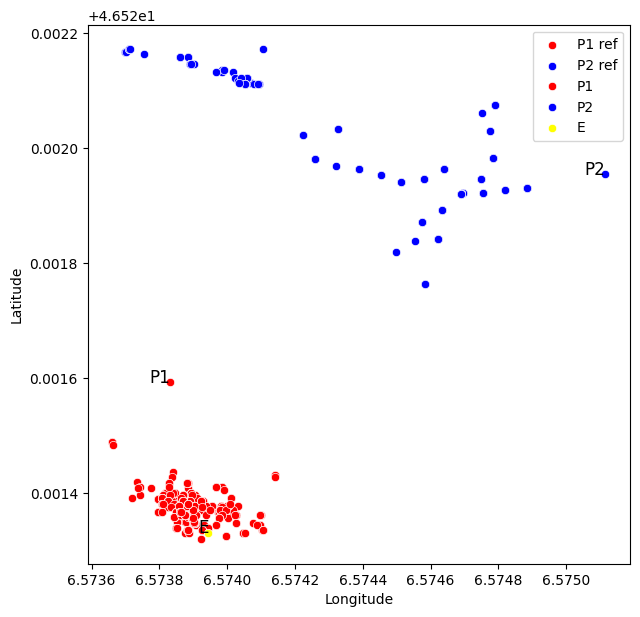

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=df_p1, x="Longitude", y="Latitude", ax=ax, label="P1 ref", color="red")
sns.scatterplot(data=df_p2, x="Longitude", y="Latitude", ax=ax, label="P2 ref", color="blue")
sns.scatterplot(x=[P1[1]], y=[P1[0]], ax=ax, label="P1", color="red")
sns.scatterplot(x=[P2[1]], y=[P2[0]], ax=ax, label="P2", color="blue")
sns.scatterplot(x=[E[1]], y=[E[0]], ax=ax, label="E", color="yellow")
ax.text(P1[1], P1[0], "P1", fontsize=12, ha='right')
ax.text(P2[1], P2[0], "P2", fontsize=12, ha='right')
ax.text(E[1], E[0], "E", fontsize=12, ha='right')



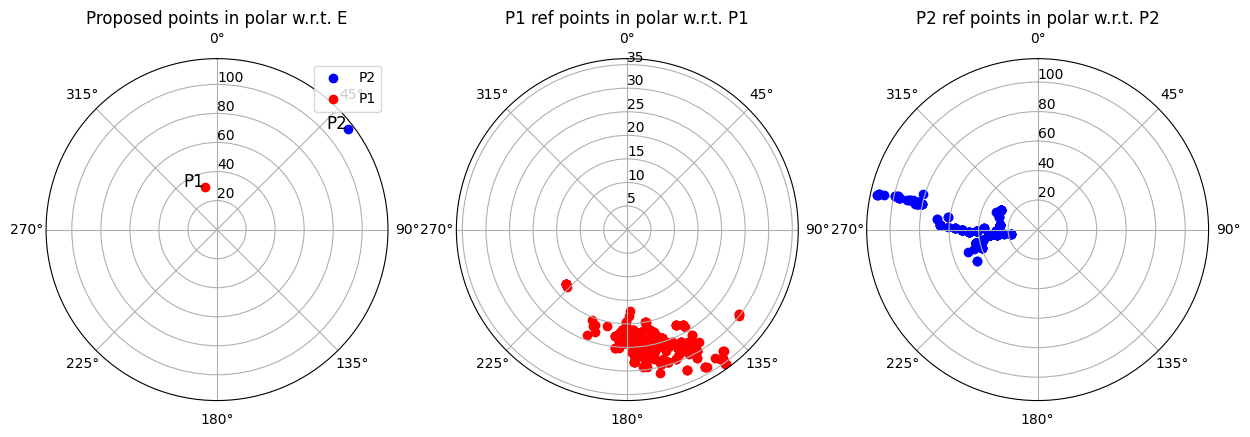

In [5]:
# polar plot
fig, ax = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(15,7))
for ax1 in ax.flatten():
    ax1.set_theta_zero_location('N')
    ax1.set_theta_direction(-1)
    ax1.set_rlabel_position(0)

ax[0].scatter(P2_dist_angle[1], P2_dist_angle[0], label="P2", color="blue")
ax[0].scatter(P1_dist_angle[1], P1_dist_angle[0], label="P1", color="red")
ax[0].text(P1_dist_angle[1], P1_dist_angle[0], "P1", fontsize=12, ha='right')
ax[0].text(P2_dist_angle[1], P2_dist_angle[0], "P2", fontsize=12, ha='right')
ax[0].set_title("Proposed points in polar w.r.t. E")
ax[0].legend()

ax[1].scatter(df_p1["Angle"], df_p1["Distance"], label="P1 ref", color="red")
ax[1].set_title("P1 ref points in polar w.r.t. P1")

ax[2].scatter(df_p2["Angle"], df_p2["Distance"], label="P2 ref", color="blue")
ax[2].set_title("P2 ref points in polar w.r.t. P2")
plt.show()


The polar chart seems to make sense. So P1 and P2 are computed w.r.t. the evidence point. Azimuth is measured clockwise, 0 deg being straight up. Therefore P2 is at approx. 45 degrees of azimuth w.r.t E and P1 is a bit below 360 deg azimuth.

**Other points are computed wi**

Text(46.521330555, 6.573944444, 'E')

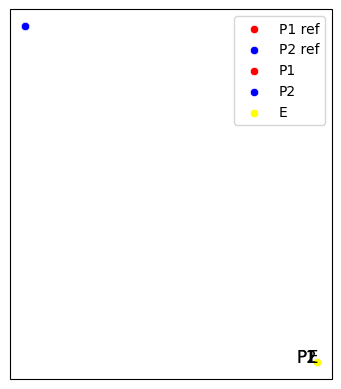

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
# Plot points on the map using Seaborn
sns.scatterplot(data=df_p1, x='Longitude', y='Latitude', transform=ccrs.PlateCarree(), color='red', ax=ax, label="P1 ref")
sns.scatterplot(data=df_p2, x='Longitude', y='Latitude', transform=ccrs.PlateCarree(), color='blue', ax=ax, label="P2 ref")
sns.scatterplot(x=[P1[0]], y=[P1[1]], ax=ax, color='red', transform=ccrs.PlateCarree(), label="P1")
sns.scatterplot(x=[P2[0]], y=[P2[1]], ax=ax, color='blue', transform=ccrs.PlateCarree(), label="P2")
sns.scatterplot(x=[E[0]], y=[E[1]], ax=ax, color='yellow', transform=ccrs.PlateCarree(), label="E")
ax.text(P1[0], P1[1], "P1", fontsize=12, ha='right', transform=ccrs.PlateCarree())
ax.text(P2[0], P2[1], "P2", fontsize=12, ha='right', transform=ccrs.PlateCarree())
ax.text(E[0], E[1], "E", fontsize=12, ha='right', transform=ccrs.PlateCarree())
